## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

## Task 1 : Logistic Regression

#### 1. Finding the Correlation between the features

In [5]:
corr = data[data.columns[:-1]].corr()
corr

,x,y,z,x*x,2*y,2*z+3*x*x,w
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000


<AxesSubplot:title={'center':'Correlation between the features'}>

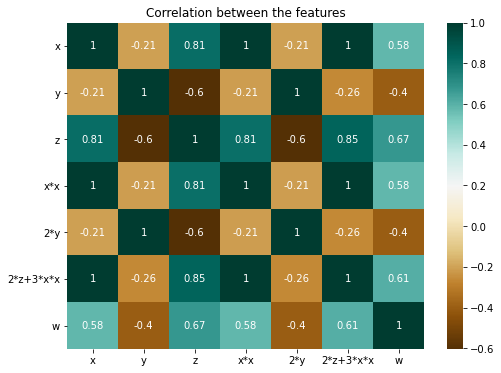

In [6]:
plt.figure(figsize=(8,6))
plt.title("Correlation between the features")
sns.heatmap(corr,cmap="BrBG",annot = True)

#### 2. Finding the best model for the given data

In [7]:
alpha = np.logspace(-5,8,10)
print("Alpha values:",alpha)
param_grid={'C':alpha}

Alpha values: [1.00000000e-05 2.78255940e-04 7.74263683e-03 2.15443469e-01
 5.99484250e+00 1.66810054e+02 4.64158883e+03 1.29154967e+05
 3.59381366e+06 1.00000000e+08]


In [8]:
LR = LogisticRegression(max_iter=10000, tol=0.1, random_state = 0)
LR = GridSearchCV(LR,param_grid,cv=5)
LR.fit(X,Y)
print("Best alpha is :",LR.best_params_['C'])

Best alpha is : 1e-05


#### 3. Getting the weights with the original data

In [9]:
best_model = LogisticRegression(max_iter=10000, tol=0.1,C=1e-05,random_state = 0)
best_model.fit(X,Y)

acc = best_model.score(X,Y)
print("Accuracy of the model is {}%".format(acc*100))

Accuracy of the model is 100.0%


In [10]:
weight = best_model.coef_[0]
print("Weights =",weight)

Weights = [ 0.0003637  -0.00034492  0.00048441  0.00035935 -0.00034492  0.0003819
  0.00032049]


#### 4. Modifying original data

In [11]:
X_New = np.random.normal(0,10**-2,X.shape)
best_model1 = LogisticRegression(max_iter=10000, tol=0.1,C=1e-05,random_state = 0)
best_model1.fit(X_New,Y)

acc1 = best_model1.score(X_New,Y)
print("Accuracy of the model with noise is {}%".format(acc1*100))

Accuracy of the model with noise is 62.0%


In [12]:
weight1 = best_model1.coef_
print("Weights =",weight1)

Weights = [[-1.03721910e-08  1.24072634e-06 -1.97814951e-07 -1.38853930e-07
  -5.89260746e-07 -6.96008720e-07  1.37269248e-07]]


#### 5.  Checking deviations in metric and weights

In [13]:
acc_diff = abs(acc - acc1)
print("Difference in Accuracy : {}%".format(np.round(acc_diff*100)))

weight_diff = abs(weight-weight1)
print("Difference in weights:",weight_diff)

weight_diff_per = weight_diff * 100
print("percentage Difference in weights:",weight_diff_per)

Difference in Accuracy : 38.0%
Difference in weights: [[0.00036371 0.00034616 0.00048461 0.00035949 0.00034433 0.0003826
  0.00032035]]
percentage Difference in weights: [[0.03637143 0.03461645 0.04846054 0.0359488  0.03443345 0.03825971
  0.03203492]]


In [14]:
top4 = np.argsort(-weight_diff_per)[:,:4]
features = data.columns
print("Top 4 features are :",features[top4])

Top 4 features are : [['z' '2*z+3*x*x' 'x' 'x*x']]


## Task2 : Linear SVM

#### 1.Finding the best SVM model for the given data

In [17]:
alpha_svm =  np.logspace(-5, 8, 10)
print("Alphas = ",alpha_svm)
param_grid={'C':alpha_svm}
svm = SVC(kernel="linear",random_state = 0)

Alphas =  [1.00000000e-05 2.78255940e-04 7.74263683e-03 2.15443469e-01
 5.99484250e+00 1.66810054e+02 4.64158883e+03 1.29154967e+05
 3.59381366e+06 1.00000000e+08]


In [16]:
model_svm = GridSearchCV(svm, param_grid, cv=5)
model_svm.fit(X,Y)
print("Best alpha is:",model_svm.best_params_['C'])

Best alpha is: 0.007742636826811269


#### 2.Getting the weights with the original data

In [18]:
best_model_svm=SVC(kernel='linear',C=0.007742636826811269,random_state=0)
best_model_svm.fit(X,Y)

acc_svm = best_model_svm.score(X,Y)
print("Accuracy of the model is {}%".format(acc_svm*100))

Accuracy of the model is 100.0%


In [19]:
weight_svm = best_model_svm.coef_
print("Weights =",weight_svm)

Weights = [[ 0.16056222 -0.20788705  0.32826166  0.14998082 -0.20788705  0.17461587
   0.13401176]]


#### 3.Modifying original data

In [20]:
X_New_svm = X + np.random.normal(0,10**-2,X.shape)
best_model_svm = SVC(kernel='linear',C=0.007742636826811269,random_state=0)
best_model_svm.fit(X_New_svm,Y)

acc1_svm = best_model_svm.score(X_New_svm,Y)
print("Accuracy of the model is {}%".format(acc1_svm*100))

Accuracy of the model is 100.0%


In [21]:
weight1_svm = best_model_svm.coef_
print("Weights =",weight1_svm)

Weights = [[ 0.16112764 -0.20612367  0.32858142  0.15085447 -0.20595574  0.17495079
   0.13471504]]


#### 4.Checking deviations in metric and weights

In [22]:
acc_diff_svm = abs(acc1_svm - acc_svm)
print("Difference in Accuracy : {}%".format(np.round(acc_diff_svm*100)))

weight_diff_svm = abs(weight1_svm - weight_svm)
print("Difference in weights:",weight_diff_svm)

weight_diff_per_svm = weight_diff_svm * 100
print("Percentage difference in weights",weight_diff_per_svm)

top4_svm = np.argsort(-weight_diff_per_svm)[:,:4]
features = data.columns
print("Top 4 features are:",features[top4_svm])

Difference in Accuracy : 0.0%
Difference in weights: [[0.00056542 0.00176338 0.00031976 0.00087365 0.00193131 0.00033492
  0.00070329]]
Percentage difference in weights [[0.05654215 0.17633837 0.03197599 0.08736534 0.19313099 0.03349245
  0.07032868]]
Top 4 features are: [['2*y' 'y' 'x*x' 'w']]


## Observations :

- Multi-collinearity doesnot affect both Logistic regression and Linear SVM.
- In case of Logistic Regression when we add the noise, the accuracy of the model is decreased.
- Noise does not affect the accuracy of Linear SVM model.
